## __Salary Prediction: based on Years of experience__

Predict salary based on Years of experience.

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import train_test_split function from sklearn's model_selection module
from sklearn.model_selection import train_test_split

# Import the LinearRegression class from scikit-learn's linear_model module
from sklearn.linear_model import LinearRegression

# Import necessary libraries for performance metrics
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Import the PolynomialFeatures class from scikit-learn's preprocessing module
from sklearn.preprocessing import PolynomialFeatures

In [9]:
salary_df = pd.read_csv("salary.csv")

In [11]:
salary_df.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [82]:
salary_df.tail()

,YearsExperience,Salary
30,11.2,127345
31,11.5,126756
32,12.3,128765
33,12.9,135675
34,13.5,139465


In [13]:
salary_df.shape

(35, 2)

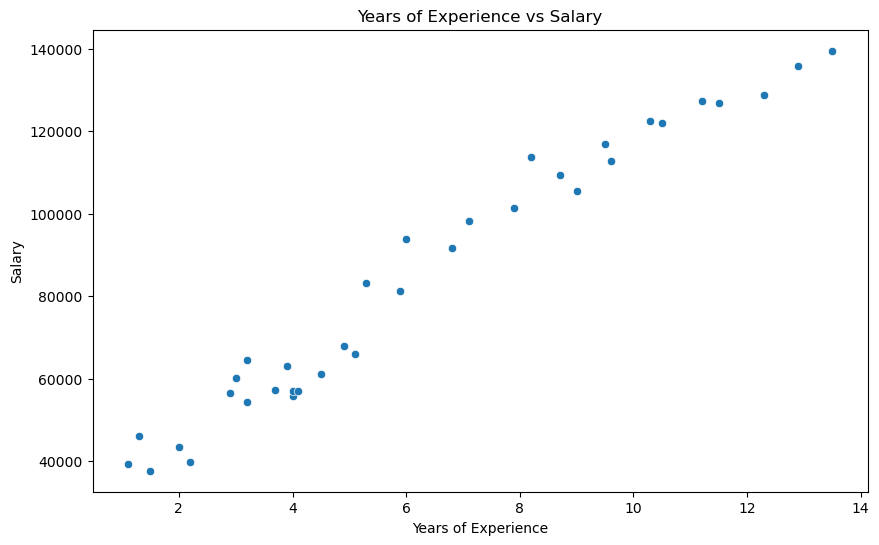

In [22]:
# Visualizing the relationship between YearsExperience and Salary

plt.figure(figsize=(10, 6))
sns.scatterplot(x='YearsExperience', y='Salary', data=salary_df) 
plt.title('Years of Experience vs Salary')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

In [24]:
# In Pandas, we have a fucntion called as corr() which calculates the correlation of all the features
salary_df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.982427
Salary,0.982427,1.000000


In [26]:
# Splitting dataset into training and testing set

X = salary_df[['YearsExperience']]
y = salary_df['Salary']

In [28]:
X.head()

,YearsExperience
0,1.1
1,1.3
2,1.5
3,2.0
4,2.2


In [30]:
y.head()

0    39343
1    46205
2    37731
3    43525
4    39891
Name: Salary, dtype: int64

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

LinearRegression()

In [38]:
y_train_pred = linear_reg.predict(X_train)
y_test_pred = linear_reg.predict(X_test)

In [40]:
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

In [42]:
print(mse_train)
print(r2_train)

30888963.781003952
0.9716360897963994


In [50]:
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

In [52]:
print(mse_test)
print(r2_test)

55761791.30626011
0.891423414004278


In [44]:
linear_reg.coef_

array([8578.76747669])

In [46]:
linear_reg.intercept_

29078.626034406858

In [59]:
data = {
    "MSE" : [mse_train, mse_test],
    "R-Squared" : [r2_train,r2_test]
}

In [64]:
linear_reg_model_params_df = pd.DataFrame(data,index = ["Training Set", "Test Set"])
linear_reg_model_params_df

,MSE,R-Squared
Training Set,3.088896e+07,0.971636
Test Set,5.576179e+07,0.891423


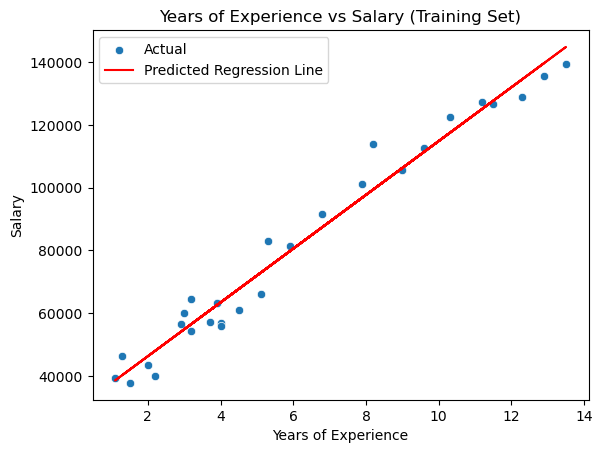

In [74]:
# Visualizing the linear regression line on the training set

sns.scatterplot(x=X_train['YearsExperience'], y=y_train, label='Actual')
plt.plot(X_train, y_train_pred, color='red', label='Predicted Regression Line')
plt.title('Years of Experience vs Salary (Training Set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend()
plt.show()


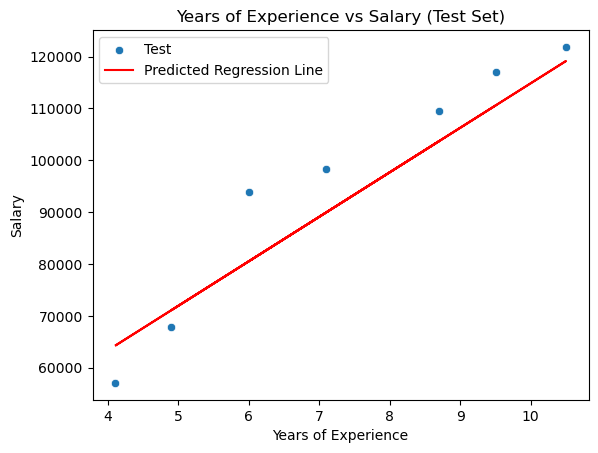

In [76]:
sns.scatterplot(x=X_test['YearsExperience'], y=y_test, label='Test')
plt.plot(X_test, y_test_pred, color='red', label='Predicted Regression Line')
plt.title('Years of Experience vs Salary (Test Set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend()
plt.show()


In [80]:
# Predicting the salary for someone with 15 years of experience

years_of_experience = [[15]]
predicted_salary = linear_reg.predict(years_of_experience)
predicted_salary

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([157760.1381847])